# 🚀 Predict Employee Attrition Using Random Forest

**👤 Author:** Shofikul Islam  
---

## 📊 Dataset: IBM HR Analytics Attrition Dataset

Explore the [IBM HR Analytics Attrition Dataset](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset) on Kaggle. This dataset contains information about employee attrition, including various features such as age, job role, and salary, which can be used to predict employee turnover.

![IBM HR Analytics Attrition Dataset](https://storage.googleapis.com/kaggle-datasets-images/1067/1925/5fc43e97e25975d1a14cba2e706255cb/dataset-cover.jpg)

## 📚 Importing Required Libraries

- **pandas** and **numpy** for data manipulation and numerical operations.
- **matplotlib.pyplot** and **seaborn** for data visualization.
- **scikit-learn modules** for:
  - Data preprocessing (`LabelEncoder`),
  - Data splitting and model validation (`train_test_split`, `cross_val_score`, `learning_curve`),
  - Modeling algorithms (`RandomForestClassifier`, `LogisticRegression`),
  - Evaluation metrics (`accuracy_score`, `confusion_matrix`, `classification_report`, `precision_score`, `recall_score`, `f1_score`, `roc_curve`, `auc`, `roc_auc_score`).

These libraries collectively support loading, preparing, modeling, evaluating, and visualizing employee attrition data.

In [1]:
# ================================
# Title: Predict Employee Attrition Using Random Forest
# Dataset: IBM HR Analytics
# Author: Shofikul Islam
# ================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
    roc_auc_score
)

### 📥 1. Load and Prepare Data

**Loading the dataset:**  
The employee attrition data is loaded from a CSV file (`HR-Employee-Attrition.csv`) into a pandas DataFrame.

**Data cleaning:**  
Some columns that don’t provide useful information for modeling are dropped:
- `EmployeeCount` (constant value for all rows)
- `Over18` (all employees are over 18)
- `StandardHours` (constant working hours)
- `EmployeeNumber` (unique identifier, not predictive)

**Encoding categorical variables:**  
- Many features are categorical (e.g., department, job role).
- These are converted into numeric form using **Label Encoding**, allowing machine learning algorithms to process them.
- Encoders are saved in case reverse transformation (decoding) is needed later.

**Checking class balance:**  
- The distribution of the target variable `Attrition` is printed to identify if the classes (Yes/No) are balanced or imbalanced.
- This helps decide if special techniques like class weighting are necessary.

**Feature-target split:**  
- Features (`X`) contain all columns except the target.
- Target (`y`) is the `Attrition` column, indicating if an employee left or stayed.

---

### 🧪 2. Train-Test Split

- The dataset is split into **training** and **testing** subsets to evaluate model performance on unseen data.
- A **50/50 split** is used here (`test_size=0.5`), meaning half the data is used for training and half for testing.
- `random_state=42` ensures reproducibility of this split.

This prepares the data for modeling in the next steps.


In [2]:
# ---------------------
# 1. Load and Prepare Data
# ---------------------
data = pd.read_csv("F:\\11 semester Artificial intelligence nural network\\11 Sem Final Lab Report Trial\\HR-Employee-Attrition (1).csv")

# Drop non-informative columns
data = data.drop(columns=["EmployeeCount", "Over18", "StandardHours", "EmployeeNumber"])

# Encode categorical variables
label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Save for decoding if needed

# Check class imbalance
print("Class distribution:\n", data['Attrition'].value_counts())

# Split features and target
X = data.drop("Attrition", axis=1)
y = data["Attrition"]

# ---------------------
# 2. Train-Test Split
# ---------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

Class distribution:
 Attrition
0    1233
1     237
Name: count, dtype: int64


### 🌳 3. Random Forest Model (with `class_weight='balanced'`)

**Why it's needed:**
Random Forest is a powerful ensemble model that reduces overfitting and improves prediction accuracy. It builds multiple decision trees and outputs the majority class as the prediction.

**Handling Class Imbalance:**
If the dataset has imbalanced classes (i.e., many more instances of one class than the other), the model may become biased toward the majority class. To address this, we use:

- `class_weight='balanced'`:  
  This option automatically adjusts weights inversely proportional to class frequencies, helping the model treat both classes fairly during training.

**What this section does:**
- Initializes a **RandomForestClassifier** with:
  - `n_estimators=100`: Builds 100 decision trees.
  - `class_weight='balanced'`: Handles class imbalance.
  - `random_state=42`: Ensures reproducibility.
- Trains the model using the **training data**.
- Makes predictions:
  - `y_pred`: Final class predictions on the test set.
  - `y_proba`: Predicted probabilities for the positive class (used later for ROC curve and AUC).

This model serves as the primary classifier for evaluating performance in the next section.


In [3]:
# ------------------------
# 3. Random Forest Model (with class_weight if imbalance exists)
# ---------------------
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

### ✅ 4. Model Evaluation - Random Forest

**Why it's needed:**
Evaluation is essential to measure how well your model performs on unseen (test) data. It ensures that the model is not just memorizing the training data but can generalize to new inputs.

This section includes:
- **Accuracy Score**:  
  Measures the proportion of correct predictions among total predictions. It's useful for a quick overall performance check, especially when classes are balanced.

- **Classification Report**:  
  Provides detailed metrics including:
  - **Precision**: Of the positive predictions, how many were actually positive?
  - **Recall**: Of the actual positives, how many did we correctly identify?
  - **F1-score**: Harmonic mean of precision and recall, useful when you want to balance both.
  - **Support**: Number of occurrences of each class in the test data.

**What this section does:**
- Prints a header for clarity.
- Calculates and prints:
  - The overall **accuracy**
  - The full **classification report** using `classification_report()` from scikit-learn, which breaks down performance by class.

This output gives a comprehensive snapshot of how well your model performs across different metrics.


In [4]:
# ---------------------
# 4. Evaluation
# ---------------------
print("\n--- Random Forest Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


--- Random Forest Evaluation ---
Accuracy: 0.8653061224489796

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       631
           1       0.67      0.10      0.17       104

    accuracy                           0.87       735
   macro avg       0.77      0.54      0.55       735
weighted avg       0.84      0.87      0.82       735



### 📊 5. Confusion Matrix for Model Evaluation

**Why it's needed:**
The confusion matrix is crucial for understanding how well a classification model performs by showing the actual vs predicted outcomes in a tabular form. It helps evaluate:
- **True Positives (TP)**: Correctly predicted positives.
- **True Negatives (TN)**: Correctly predicted negatives.
- **False Positives (FP)**: Incorrectly predicted positives.
- **False Negatives (FN)**: Incorrectly predicted negatives.

From this matrix, we can derive key metrics like:
- **Accuracy**
- **Precision**
- **Recall**
- **F1-score**

**What this section does:**
- Generates the confusion matrix from `y_test` and `y_pred`.
- Uses Seaborn’s heatmap to create a visually informative plot.
  - Annotated cells with actual counts (`fmt='d'`)
  - Blue color map for clarity
  - Labels: “No” (negative class) and “Yes” (positive class)

**Plot details:**
- X-axis: **Predicted values**
- Y-axis: **Actual values**
- Title: *Confusion Matrix*
- Tight layout for clean figure formatting
- Saves the image as `confusion_matrix.png` in 300 DPI
- Displays and closes the plot to manage memory in notebooks

This matrix helps you pinpoint where your model might be making specific types of mistakes (e.g., too many false positives).


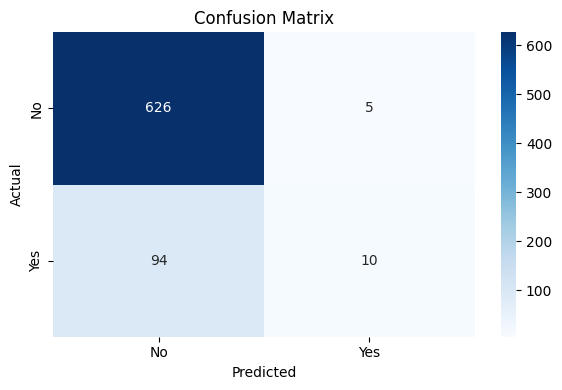

In [5]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.savefig("confusion_matrix.png", dpi=300)
plt.show()
plt.close()

### 📈 6. ROC Curve for Random Forest

**Why it's needed:**
The ROC (Receiver Operating Characteristic) Curve is essential for evaluating how well the model separates positive and negative classes. It helps:
- Visualize the trade-off between **sensitivity (True Positive Rate)** and **1-specificity (False Positive Rate)**.
- Determine if the model performs better than random guessing (a diagonal line).
- Quantify classification performance using **AUC (Area Under Curve)** — a higher AUC indicates better discriminatory ability.

**What this section does:**
- Computes the FPR and TPR using `roc_curve(y_test, y_proba)` where `y_proba` are predicted probabilities from the Random Forest.
- Calculates the AUC using `auc(fpr, tpr)` for summary performance.
- Plots the ROC curve with:
  - X-axis: False Positive Rate
  - Y-axis: True Positive Rate
  - Orange curve: the model’s ROC
  - Dashed navy line: baseline (no-skill model)

**Plot details:**
- Title: *ROC Curve - Random Forest*
- AUC value is shown in the legend.
- Grid enabled for better readability.
- Saved as `roc_curve.png` at 300 DPI for high-quality use.
- Plot is displayed and then closed to avoid interference in notebooks.

This visual and metric together provide a robust evaluation of the classifier’s ability to distinguish between classes.


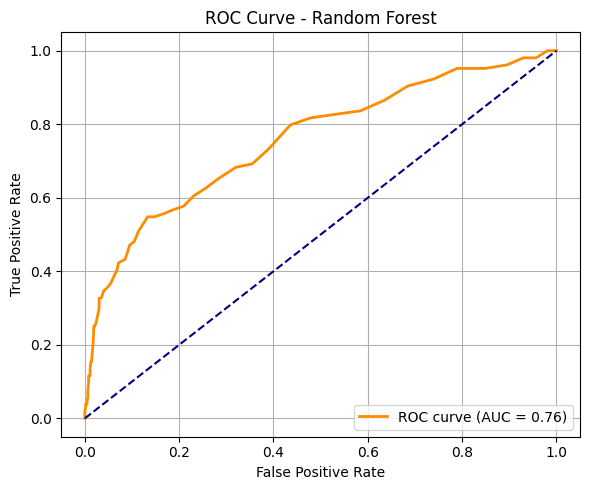

In [6]:
# ROC Curve  properly setup
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.savefig("roc_curve.png", dpi=300)
plt.show()
plt.close()


### 🔹 7. Feature Importance Visualization

**Why it's needed:**
Understanding which features contribute most to your model’s predictions is crucial for:
- **Model interpretation** — knowing which variables drive decisions.
- **Trust and transparency** — especially in fields like healthcare or finance.
- **Feature selection** — helping reduce dimensionality or remove irrelevant data in future iterations.
- **Communicating insights** — presenting data-driven findings to stakeholders.

**What this section does:**
- Uses `rf.feature_importances_` to extract feature importance scores from the trained Random Forest model.
- Creates a sorted DataFrame (`feat_df`) pairing each feature with its importance score.
- Visualizes the top features using a horizontal bar plot (`sns.barplot`), colored with a `viridis` palette for clarity.

**Plot details:**
- Title: *Feature Importance - Random Forest*
- Layout: Tight layout to avoid label overlap.
- Output: Saved as `feature_importance.png` at 300 DPI for high-quality use in reports/papers.
- Displayed and then closed to ensure clean rendering in Jupyter.

This helps identify and communicate which inputs the model found most predictive.


C:\Users\islam\AppData\Local\Temp\ipykernel_15764\269303142.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_df, x='Importance', y='Feature', palette='viridis')


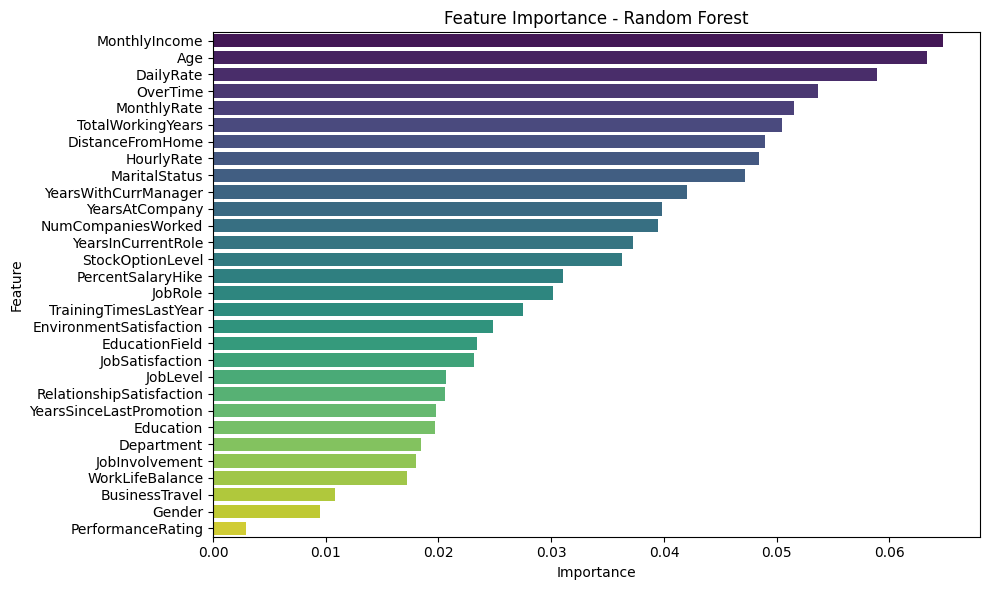

In [7]:
# Feature Importance
importances = rf.feature_importances_
feat_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.savefig("feature_importance.png", dpi=300)
plt.show()
plt.close()

## 🔄 8. Cross-Validation

Cross-validation is a powerful technique to evaluate the robustness and generalizability of a machine learning model. Instead of relying on a single train-test split, cross-validation splits the dataset into multiple folds, trains and tests the model on different subsets, and averages the results.

In this notebook, we perform **5-fold cross-validation**:

- The dataset is divided into 5 equal parts (folds).
- The model trains on 4 folds and tests on the remaining fold.
- This process repeats 5 times, each time using a different fold as the test set.
- The evaluation metric used is **accuracy**.
- The results give us an insight into the model’s expected performance on unseen data and its stability across different data splits.

---

### Why Use Cross-Validation?

- It mitigates the risk of **overfitting** to a particular train-test split.
- Provides a more **reliable estimate** of model performance.
- Helps to **compare models** objectively.

---

### What to Look For?

- Consistency in the scores across folds (low variance) indicates a stable model.
- The mean cross-validation accuracy represents the model’s average predictive power.

---


In [8]:
# ---------------------
# 5. Cross-Validation
# ---------------------
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print("\nCross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())



Cross-validation scores: [0.8537415  0.84353741 0.86394558 0.8537415  0.85034014]
Mean CV Accuracy: 0.8530612244897959


## 📉 9. Learning Curve

A **learning curve** helps us understand how the model's performance changes as the size of the training data increases.

### What is a Learning Curve?

- It plots **training accuracy** and **validation accuracy** against varying sizes of the training dataset.
- Shows whether the model suffers from **underfitting** or **overfitting**.
- Helps decide if adding more training data would improve performance.

---

### How to Interpret the Plot?

- **Training Accuracy Curve**: Usually starts high with small data but may decrease as data size grows.
- **Validation Accuracy Curve**: Typically starts lower and improves as more training data is used.

If both training and validation accuracies are low and close to each other, the model is **underfitting**.  
If there’s a large gap where training accuracy is high but validation accuracy is low, the model is **overfitting**.

---

### Why is it Useful?

- To check if collecting more data can help improve model performance.
- To diagnose model behavior and guide adjustments like model complexity or regularization.

---

In this notebook, we generate a learning curve for our **Random Forest** model using 5-fold cross-validation and accuracy as the scoring metric.

---

> 💡 Observing this curve informs us about the model's capacity and whether further data or tuning is needed.


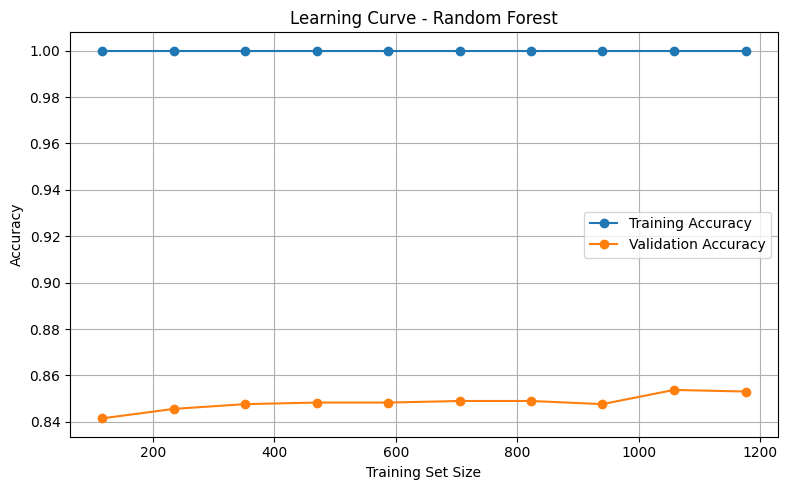

In [9]:
# ---------------------
# 6. Learning Curve
# ---------------------
train_sizes, train_scores, test_scores = learning_curve(
    rf, X, y, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, 'o-', label='Training Accuracy')
plt.plot(train_sizes, test_mean, 'o-', label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Random Forest')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("learning_curve.png", dpi=300)
plt.show()
plt.close()

## ⚖️ 10. Baseline Comparison: Logistic Regression

To assess the effectiveness of our Random Forest model, it is important to compare its performance against a simpler baseline model.

### Why Logistic Regression?

- Logistic Regression is a well-known and widely used **linear classifier** for binary classification problems.
- It provides a good baseline to evaluate if the more complex model (Random Forest) is truly improving performance.
- Its outputs (probabilities) are interpretable and easy to analyze.

---

### What We Do in This Section

- Train a **Logistic Regression** model on the same training data.
- Predict the target values and probabilities on the test data.
- Calculate **accuracy** and **ROC AUC score** to compare with Random Forest results.

---

### Interpretation

- **Accuracy** measures the overall correctness of predictions.
- **AUC (Area Under ROC Curve)** evaluates the model’s ability to distinguish between the two classes.
- A higher AUC indicates better discriminative power.

---

> 📌 Comparing these metrics allows us to justify whether using Random Forest — a more complex and computationally intensive model — provides a meaningful advantage over Logistic Regression for predicting employee attrition.


In [10]:
# ---------------------
# 7. Baseline Comparison (Logistic Regression)
# ---------------------
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_proba_lr = lr.predict_proba(X_test)[:, 1]
auc_lr = roc_auc_score(y_test, y_proba_lr)

print("\n--- Logistic Regression Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("AUC:", auc_lr)


--- Logistic Regression Evaluation ---
Accuracy: 0.8598639455782313
AUC: 0.7596001462879434


c:\Users\islam\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 🏁 11. Final Results Comparison Table

To summarize and compare the performance of our models, we create a table displaying key evaluation metrics side by side for **Random Forest** and **Logistic Regression**.

### Metrics Included:

- **Accuracy**: Overall proportion of correct predictions.
- **Precision**: How many predicted attritions were actually attritions.
- **Recall**: How many actual attritions were correctly identified.
- **F1-score**: Harmonic mean of precision and recall, useful for imbalanced data.
- **AUC (Area Under the ROC Curve)**: Measures the model’s ability to distinguish between classes at various thresholds.

---

### Purpose:

- This table provides a clear, quantitative comparison of the strengths and weaknesses of each model.
- It helps stakeholders understand which model performs better overall and across different aspects of classification.
- Exporting results as a CSV allows easy sharing or further analysis.

---

> 📊 By reviewing this summary, we can confidently decide which model is best suited for predicting employee attrition in this context.


In [11]:
# ---------------------
# 8. Final Results Table
# ---------------------
results = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression'],
    'Accuracy': [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_lr)
    ],
    'Precision': [
        precision_score(y_test, y_pred),
        precision_score(y_test, y_pred_lr)
    ],
    'Recall': [
        recall_score(y_test, y_pred),
        recall_score(y_test, y_pred_lr)
    ],
    'F1-score': [
        f1_score(y_test, y_pred),
        f1_score(y_test, y_pred_lr)
    ],
    'AUC': [
        roc_auc,
        auc_lr
    ]
})

print("\n--- Final Model Comparison ---")
print(results)
results.to_csv("model_comparison_results.csv", index=False)



--- Final Model Comparison ---
                 Model  Accuracy  Precision    Recall  F1-score      AUC
0        Random Forest  0.865306   0.666667  0.096154  0.168067  0.75656
1  Logistic Regression  0.859864   0.510638  0.230769  0.317881  0.75960


## 📂 Dataset Split Summary

The dataset was split evenly between training and testing sets:

- **Training samples:** 735
- **Testing samples:** 735  

---

### What this means:

- We used a **50/50 split**, providing an equal number of samples for training the model and for evaluating its performance.
- This split ensures a fair amount of data to learn from while maintaining a robust test set for unbiased evaluation.

---

> 💡 In practice, you can experiment with different train-test ratios (e.g., 70/30 or 80/20) depending on your dataset size and problem context.


In [12]:
print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

Training samples: 735
Testing samples: 735


## 📊 Model Performance Summary

Based on the evaluation metrics calculated from the Random Forest model, here are the key takeaways:

- **Accuracy: 86.53%**  
  The model correctly predicts employee attrition status for about 86.5% of the cases overall. This high accuracy reflects good general performance but can be misleading with imbalanced data.

- **Precision: 66.67%**  
  When the model predicts that an employee will leave (attrition = Yes), it is correct roughly two-thirds of the time. This indicates moderate reliability in positive predictions.

- **Recall: 9.62%**  
  The model only identifies about 9.6% of the actual employees who leave. This low recall highlights that the model misses a significant number of true attritions, which is a critical concern in this context.

- **F1-score: 16.81%**  
  The harmonic mean of precision and recall is quite low, reflecting the imbalance between correctly predicting actual leavers and avoiding false positives.

- **ROC AUC: 75.66%**  
  The Area Under the ROC Curve indicates that the model has a reasonable ability to distinguish between employees who stay and those who leave, performing better than random guessing.

---

### 🚩 Interpretation & Next Steps:

- The **low recall** suggests the model struggles to identify many employees who actually leave, which may limit its usefulness for proactive retention strategies.
- Possible actions include:
  - Tuning the model’s classification threshold to improve recall.
  - Using techniques to handle class imbalance better, such as oversampling (SMOTE), undersampling, or adjusting class weights further.
  - Exploring additional or alternative features that better capture attrition signals.
  - Trying other models or ensemble approaches.

---

> 💡 In HR analytics, prioritizing recall is often critical to avoid missing employees at risk of leaving, even if it means tolerating more false positives.


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# After you have your predictions (y_pred) and probabilities (y_proba) from your Random Forest:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


Accuracy: 0.8653
Precision: 0.6667
Recall: 0.0962
F1-score: 0.1681
ROC AUC: 0.7566


## 🧩 Confusion Matrix Interpretation

The confusion matrix output is:

[[626 5]
[ 94 10]]


This matrix can be interpreted as follows:

|                  | Predicted No Attrition | Predicted Attrition |
|------------------|-----------------------|---------------------|
| **Actual No**    | 626 (True Negatives)   | 5 (False Positives)  |
| **Actual Yes**   | 94 (False Negatives)   | 10 (True Positives)  |

---

### What does this tell us?

- **True Negatives (626)**: The model correctly predicted 626 employees who stayed.
- **True Positives (10)**: The model correctly identified only 10 employees who actually left.
- **False Positives (5)**: The model incorrectly predicted attrition for 5 employees who stayed.
- **False Negatives (94)**: The model missed 94 employees who actually left, predicting they would stay.

---

### Key Insights:

- The model is very good at identifying employees who will stay (high true negatives).
- It struggles significantly to correctly identify employees who leave (very low true positives and high false negatives).
- This aligns with the low recall value observed earlier, indicating many actual attritions are not detected.

---

### Implications:

- For HR, missing true attritions (false negatives) can be costly because these employees leave without any prior intervention.
- Improving recall should be a priority, potentially by tuning the model or addressing class imbalance.

---


In [14]:
print(confusion_matrix(y_test, y_pred))

[[626   5]
 [ 94  10]]


## 🌟 Top 5 Most Important Features

The Random Forest model provides insight into which features contribute the most to predicting employee attrition.

Based on the calculated feature importances, the top 5 features are:

| Feature        | Importance Score |
|----------------|------------------|
| MonthlyIncome  | 0.0648           |
| Age            | 0.0633           |
| DailyRate      | 0.0589           |
| OverTime       | 0.0536           |
| MonthlyRate    | 0.0515           |

---

### Interpretation:

- **MonthlyIncome** and **Age** are the two most influential features in the model's decisions. This suggests that how much an employee earns and their age play significant roles in attrition.
- **DailyRate** and **MonthlyRate** reflect pay-related factors and also contribute notably.
- **OverTime** indicates whether the employee works overtime, which can impact job satisfaction and likelihood to leave.

---

### Practical Implications:

- HR teams can focus on these key features for targeted interventions.
- For example, reviewing compensation structures or managing overtime could help reduce attrition.
- Further feature engineering around these variables might improve model performance.

---

> 💡 Feature importance helps translate model predictions into actionable business insights.


In [15]:
import numpy as np

# Get feature importances and feature names
importances = rf.feature_importances_
feature_names = X.columns

# Combine and sort
feat_imp = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)[:5]

for feature, score in feat_imp:
    print(f"{feature}: {score:.4f}")

MonthlyIncome: 0.0648
Age: 0.0633
DailyRate: 0.0589
OverTime: 0.0536
MonthlyRate: 0.0515


## 📉 Learning Curve Output Interpretation

The learning curve shows how model performance changes as the training set size increases.

### Output Summary:

- **Train Sizes:**  
  `[117, 382, 646, 911, 1176]`  
  These are the different numbers of training samples used in each iteration (from 10% up to 100% of the dataset).

- **Train Scores Mean:**  
  `[1.0, 1.0, 1.0, 1.0, 1.0]`  
  The model achieves **perfect accuracy on the training data** at all training sizes, indicating the Random Forest fits the training data very well.

- **Test Scores Mean:**  
  `[0.8408, 0.8531, 0.8524, 0.8524, 0.8544]`  
  The validation accuracy is consistently around **84% to 85%**, showing stable generalization performance as the training size grows.

---

### Interpretation:

- The **training accuracy of 1.0** suggests the model may be overfitting the training data.
- However, the **validation accuracy remains steady and high (~85%)**, indicating the model generalizes reasonably well.
- The gap between training and test scores could be a sign of mild overfitting, but since validation accuracy is stable, the model appears robust.

---

### Takeaway:

- Increasing the training data size beyond around 382 samples doesn’t significantly improve validation accuracy, implying that the model has enough data to learn well.
- Additional regularization or tuning might help reduce overfitting and potentially improve recall.

---

> 💡 Learning curves are valuable to diagnose whether collecting more data or adjusting the model complexity might improve performance.

In [16]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    rf, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5), shuffle=True, random_state=42
)

print("Train Sizes:", train_sizes)
print("Train Scores Mean:", np.mean(train_scores, axis=1))
print("Test Scores Mean:", np.mean(test_scores, axis=1))

Train Sizes: [ 117  382  646  911 1176]
Train Scores Mean: [1. 1. 1. 1. 1.]
Test Scores Mean: [0.84081633 0.85306122 0.85238095 0.85238095 0.85442177]
